# ringzer0ctf
## Challenge: Cryptography 1 "Some Martian Message"
url: https://ringzer0ctf.com/challenges/25

The Challenge is simply the below cipher string with the only hint being it is cryptography related and that we need to find a 'flag' to submit.

In [1]:
cipher = 'SYNTPrfneVfPbbyOhgAbgFrpher'

Since this was the first challenge of this catagory, I assumed it wouldn't be too complicated and decided to test whether is was a simple ring cipher (AKA rot, caesar cipher). Spoiler... it is. A ring cipher takes plain-text and maps each character a certain number of letters 'down' the alphabet. If you reach the end of your alphabet while mapping a character you continue from the start of the alphabet. Here is thought process and python code that led to unmasking the cipher text. 

To test this hypothesis, I viewed the steps roughly as:

1. Convert the cipher text to ASCII code
2. Shift the codes by some amount
3. Convert the shifted ASCII codes back to plain text
4. Do steps 1 - 3 for all possible shift values to see if one decrypts the cipher text

## 1. Convert to ASCII

In python, the built-in `ord()` function returns the ASCII (Unicode) code point of a character, so this step was simple enough.


In [2]:
def string_to_ascii_codes(input_string):
    return [ord(char) for char in input_string]

Sanity check:

In [3]:
print(string_to_ascii_codes(cipher))

[83, 89, 78, 84, 80, 114, 102, 110, 101, 86, 102, 80, 98, 98, 121, 79, 104, 103, 65, 98, 103, 70, 114, 112, 104, 101, 114]


## 2. Shift the ASCII codes

Now, there many ways to do this. Since the ASCII codes for the characters in our cipher text (A-Z and a-z) have inconvient values for modular arithmetic, I settled on mapping them to the values 0 - 51. From there, I could perform the ring-shift, then bring them back to the corresponding ASCII values.
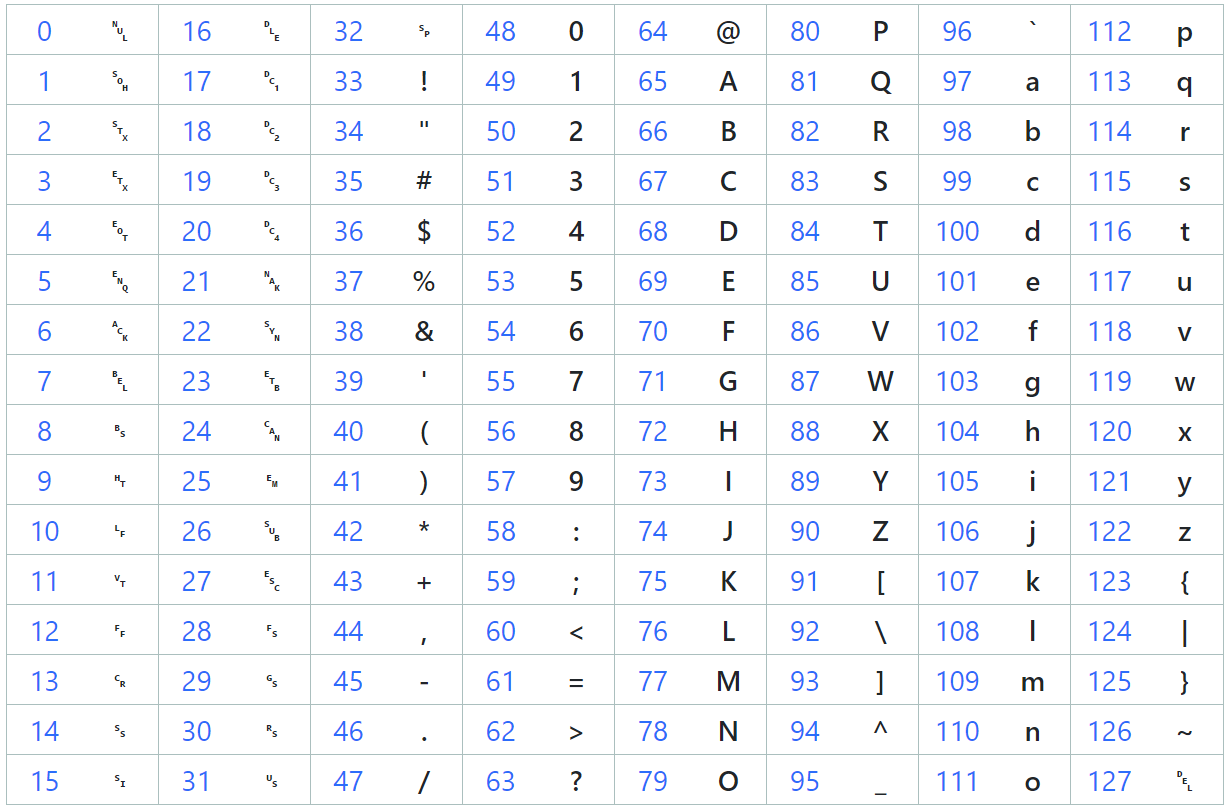
source: https://www.ascii-code.com/ASCII/compact

### A. Shift Down

Here we can subtract 65 from all the uppercase letters (ASCII 65 - 90) and subtract 71 from all the lowercase letters (ASCII 97 - 122) to achieve our contigious mapping between 0 and 51.

Note: ASCII code points outside of these ranges were implicitly ignored in this and all subsequent steps. Specifically, ASCII code points between 0 and 64 do get properly mapped, but code points 91 - 96 or above 122 do not.

In [4]:
def shift_codes_down(ascii_codes):
    return [code - 65 if code < 91 else code - 71 for code in ascii_codes]

Sanity check:

In [5]:
print(shift_codes_down(string_to_ascii_codes(cipher)))

[18, 24, 13, 19, 15, 43, 31, 39, 30, 21, 31, 15, 27, 27, 50, 14, 33, 32, 0, 27, 32, 5, 43, 41, 33, 30, 43]


### B. The Ring Shift

Once our down-shifted ASCII codes are in the right range, performing the ring shift is easy, and can be done in one line. 

Note: I do bound the magnitude of the shift to not be larger than our alphabet, as the modulo 52 shift gives the same result. For a rapid analogy, shifting by the whole alphabet is the equivalent of asking someone what time it will be in exactly 24 hours. The answer is identical as to asking what time is it now.

In [6]:
def ring_shift(shift, down_shifted_codes):
    shift = shift % 52
    return [(code + shift) % 52 for code in down_shifted_codes]

Sanity Check:

In [7]:
print(ring_shift(52,shift_codes_down(string_to_ascii_codes(cipher))))

[18, 24, 13, 19, 15, 43, 31, 39, 30, 21, 31, 15, 27, 27, 50, 14, 33, 32, 0, 27, 32, 5, 43, 41, 33, 30, 43]


### C. Shift Up

Now that we have shifted the cipher text by the desired amount we can map these values back to their correct ASCII code values, by adding 65 to our 'uppercase letters' and 71 to 'lowercase letters'.

In [8]:
def shift_codes_up(ring_shifted_codes):
    return [code + 65 if code < 26 else code + 71 for code in ring_shifted_codes]

Sanity check: 

For a 52 (or zero) character shift this should be the exactly the same ASCII code as the original cipher text.

In [9]:
print(shift_codes_up(ring_shift(52,shift_codes_down(string_to_ascii_codes(cipher)))))

[83, 89, 78, 84, 80, 114, 102, 110, 101, 86, 102, 80, 98, 98, 121, 79, 104, 103, 65, 98, 103, 70, 114, 112, 104, 101, 114]


## 3. Convert ASCII codes to plain text

The `chr()` function converts an ASCII (Unicode) code into the corresponding character.

In [10]:
def ascii_to_string(ascii_codes):
    chars = [chr(code) for code in ascii_codes]
    return ''.join(chars)

Sanity check:

Again, with a 52 character shift, this should return our original cipher text, which it does.

In [11]:
print(ascii_to_string(shift_codes_up(ring_shift(52,shift_codes_down(string_to_ascii_codes(cipher))))))

SYNTPrfneVfPbbyOhgAbgFrpher


## 4. Try all shift values

Given our alphabet there could be 52 potential shift values. Here we combine all the preceding functions for shift values 0 - 51, to attempt to decrypt the cipher text.

Can you spot the decrypted flag?

In [12]:
def print_all_ring_shifts(cipher_string):
    for shift in range(52):
        ascii_codes = string_to_ascii_codes(cipher_string)
        shifted_down_codes = shift_codes_down(ascii_codes)
        ring_shifted_codes = ring_shift(shift, shifted_down_codes)
        shifted_up_codes = shift_codes_up(ring_shifted_codes)
        shifted_cipher_string = ascii_to_string(shifted_up_codes)
        print(f"Shift: {shift:2} \ttext: {shifted_cipher_string}")

In [13]:
print_all_ring_shifts(cipher)

Shift:  0 	text: SYNTPrfneVfPbbyOhgAbgFrpher
Shift:  1 	text: TZOUQsgofWgQcczPihBchGsqifs
Shift:  2 	text: UaPVRthpgXhRddAQjiCdiHtrjgt
Shift:  3 	text: VbQWSuiqhYiSeeBRkjDejIuskhu
Shift:  4 	text: WcRXTvjriZjTffCSlkEfkJvtliv
Shift:  5 	text: XdSYUwksjakUggDTmlFglKwumjw
Shift:  6 	text: YeTZVxltkblVhhEUnmGhmLxvnkx
Shift:  7 	text: ZfUaWymulcmWiiFVonHinMywoly
Shift:  8 	text: agVbXznvmdnXjjGWpoIjoNzxpmz
Shift:  9 	text: bhWcYAowneoYkkHXqpJkpOAyqnA
Shift: 10 	text: ciXdZBpxofpZllIYrqKlqPBzroB
Shift: 11 	text: djYeaCqypgqammJZsrLmrQCAspC
Shift: 12 	text: ekZfbDrzqhrbnnKatsMnsRDBtqD
Shift: 13 	text: flagcEsAriscooLbutNotSECurE
Shift: 14 	text: gmbhdFtBsjtdppMcvuOpuTFDvsF
Shift: 15 	text: hncieGuCtkueqqNdwvPqvUGEwtG
Shift: 16 	text: iodjfHvDulvfrrOexwQrwVHFxuH
Shift: 17 	text: jpekgIwEvmwgssPfyxRsxWIGyvI
Shift: 18 	text: kqflhJxFwnxhttQgzyStyXJHzwJ
Shift: 19 	text: lrgmiKyGxoyiuuRhAzTuzYKIAxK
Shift: 20 	text: mshnjLzHypzjvvSiBAUvAZLJByL
Shift: 21 	text: ntiokMAIzqAkwwTjCBVwBaMKCzM
Shift: 22 

### Good news! 
Shifting by 13 decrypts the cipher text revealing "flagcEsAriscooLbutNotSECurE"! Shifting by 39 also reveals the same message with inversed case.

## 5. Post-mortem
Now, this theory could have been verified much faster, if I hadn't decided to write the code myself. Libraries already implement this cipher, many online tools have it as well, and simply by ignoring the case of the characters it can be writen much more consisely. I do believe that there is value, without constantly trying to reinvent the wheel, to implementing some things from scratch from time to time. I find it deepens understanding of the underlying algorithm and increases appreciation of others codes when we come across the inevitable better implementation.

## 6. Bonus

Here are an encryption and decryption function pair. They can encrypt/decrypt any string of the characters A-Z and a-z, including our cipher text, by the desired shift value.

In [14]:
def ring_cypher_decrypt(shift,cipher_string):
    ascii_codes = string_to_ascii_codes(cipher_string)
    shifted_down_codes = shift_codes_down(ascii_codes)
    ring_shifted_codes = ring_shift(shift, shifted_down_codes)
    shifted_up_codes = shift_codes_up(ring_shifted_codes)
    shifted_cipher_string = ascii_to_string(shifted_up_codes)
    return shifted_cipher_string

def ring_cypher_encrypt(shift,string):
    return ring_cypher_decrypt(-shift,string)

In [15]:
print(ring_cypher_encrypt(13,"flagcEsAriscooLbutNotSECurE"))

SYNTPrfneVfPbbyOhgAbgFrpher


In [16]:
print(ring_cypher_decrypt(13,"SYNTPrfneVfPbbyOhgAbgFrpher"))

flagcEsAriscooLbutNotSECurE
